In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
dfMS = pd.read_csv('HIST_PAINEL_COVIDBR_11ago2020(1).csv', low_memory=False)
dfMS['data'] = pd.to_datetime(dfMS['data'], dayfirst=True)

In [34]:
dfMS = dfMS.loc[:,['data','estado','municipio','populacaoTCU2019','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
# dfMS = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS = dfMS.dropna()
dfMS

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12046,2020-03-27,AC,Acrelândia,15256,0,0,0,0
12047,2020-03-28,AC,Acrelândia,15256,0,0,0,0
12048,2020-03-29,AC,Acrelândia,15256,2,2,0,0
12049,2020-03-30,AC,Acrelândia,15256,6,4,0,0
12050,2020-03-31,AC,Acrelândia,15256,7,1,0,0
...,...,...,...,...,...,...,...,...
67241,2020-08-07,TO,Xambioá,11540,580,1,8,0
67242,2020-08-08,TO,Xambioá,11540,583,3,8,0
67243,2020-08-09,TO,Xambioá,11540,597,14,8,0
67244,2020-08-10,TO,Xambioá,11540,597,0,8,0


In [35]:
dfMunicipio = dfMS['municipio'].astype(str).unique()
dfMunicipio

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', ..., 'Tupiratins',
       'Wanderlândia', 'Xambioá'], dtype=object)

In [36]:
dfEstado = dfMS['estado'].astype(str).unique()
dfEstado

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [37]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12183,2020-08-11,AC,Acrelândia,15256,308,4,7,0
12321,2020-08-11,AC,Assis Brasil,7417,392,6,8,0
12459,2020-08-11,AC,Brasiléia,26278,909,9,12,0
12597,2020-08-11,AC,Bujari,10266,346,4,6,0
12735,2020-08-11,AC,Capixaba,11733,232,0,7,0
...,...,...,...,...,...,...,...,...
66555,2020-08-11,TO,Tocantínia,7545,271,15,4,0
66831,2020-08-11,TO,Tupirama,1891,43,3,1,0
66969,2020-08-11,TO,Tupiratins,2671,6,0,0,0
67107,2020-08-11,TO,Wanderlândia,11683,189,7,5,0


In [38]:
dfMSelect = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
sumCases = dfMSelect.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [39]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,estado,casosNovos,obitosNovos
0,Other_States,1306705,36523
1,SP,639420,25571
2,BA,195603,4043
3,CE,188720,8011
4,RJ,182563,14212
5,PA,169613,5901
6,MG,156038,3571
7,MA,132060,3204
8,DF,127484,1815


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb85e97550>,
      dtype=object)

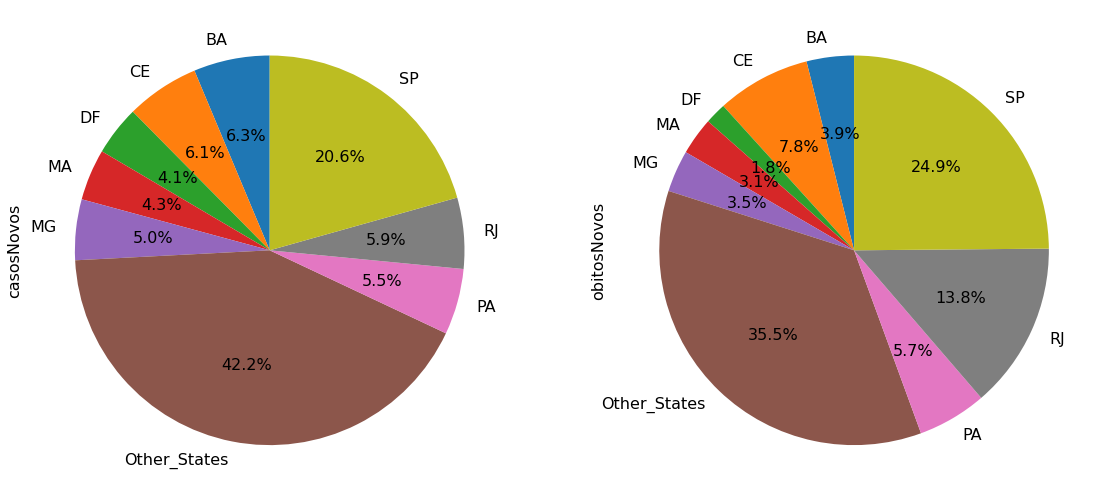

In [40]:
sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [87]:
dfSP = dfToday[(dfToday['estado'] == 'MG') & (dfToday['casosAcumulado'] > 1000)]
dfSP = dfSP.sort_values(by=['casosAcumulado'], ascending=False)
dfSP

,data,estado,municipio,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
324891,2020-08-11,MG,Belo Horizonte,2512070,25096,0,670,0
429495,2020-08-11,MG,Uberlândia,691305,14821,182,272,5
365049,2020-08-11,MG,Ipatinga,263410,6282,56,106,0
359253,2020-08-11,MG,Governador Valadares,279885,4949,42,164,0
344073,2020-08-11,MG,Contagem,663855,4311,25,203,0
...,...,...,...,...,...,...,...,...
427011,2020-08-11,MG,Timóteo,89842,1168,0,44,0
424803,2020-08-11,MG,Sete Lagoas,239639,1133,30,15,0
354423,2020-08-11,MG,Extrema,36225,1116,24,9,0
379401,2020-08-11,MG,Mariana,60724,1090,0,14,1


In [88]:
today = pd.to_datetime("today").date()
today

datetime.date(2020, 8, 13)

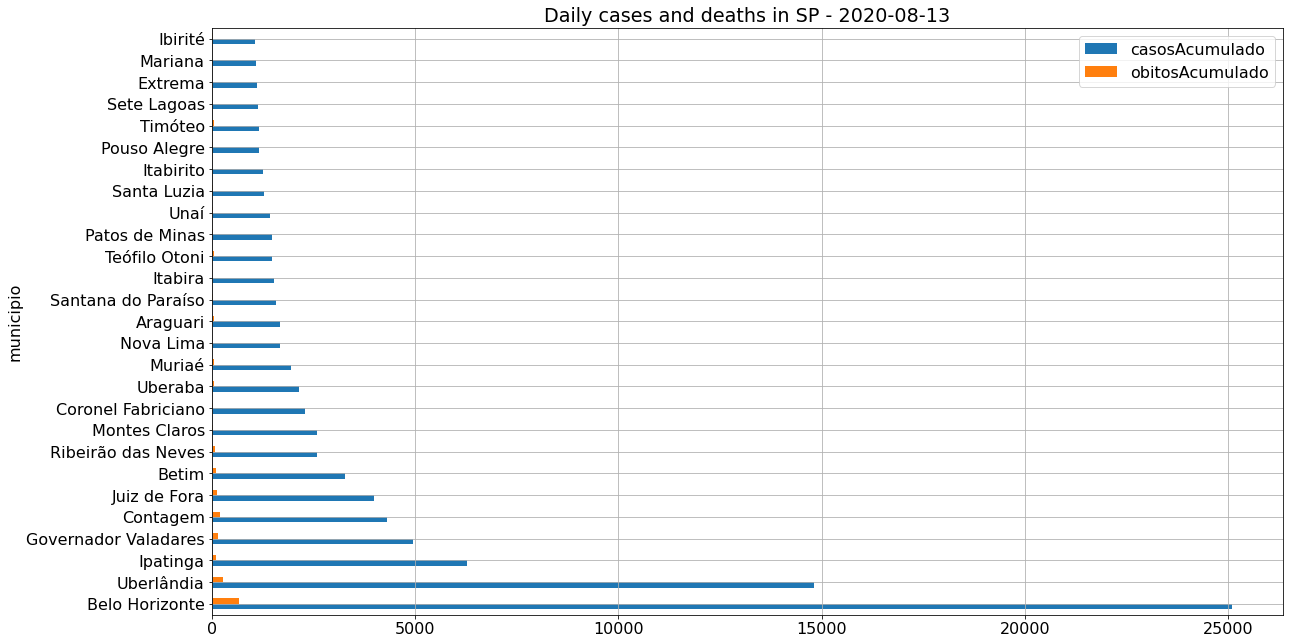

In [89]:
dfSP.plot.barh(x='municipio', y=['casosAcumulado','obitosAcumulado'], figsize=(19.20,10.80))
plt.title('Daily cases and deaths in SP - '+str(today))
plt.grid()

In [90]:
dfSP = dfSP.loc[:,['municipio','casosAcumulado','obitosAcumulado']]
dfSP = dfSP.set_index('municipio')
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
Belo Horizonte,25096,670
Uberlândia,14821,272
Ipatinga,6282,106
Governador Valadares,4949,164
Contagem,4311,203
...,...,...
Timóteo,1168,44
Sete Lagoas,1133,15
Extrema,1116,9


In [91]:
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
Belo Horizonte,25096,670
Uberlândia,14821,272
Ipatinga,6282,106
Governador Valadares,4949,164
Contagem,4311,203
...,...,...
Timóteo,1168,44
Sete Lagoas,1133,15
Extrema,1116,9


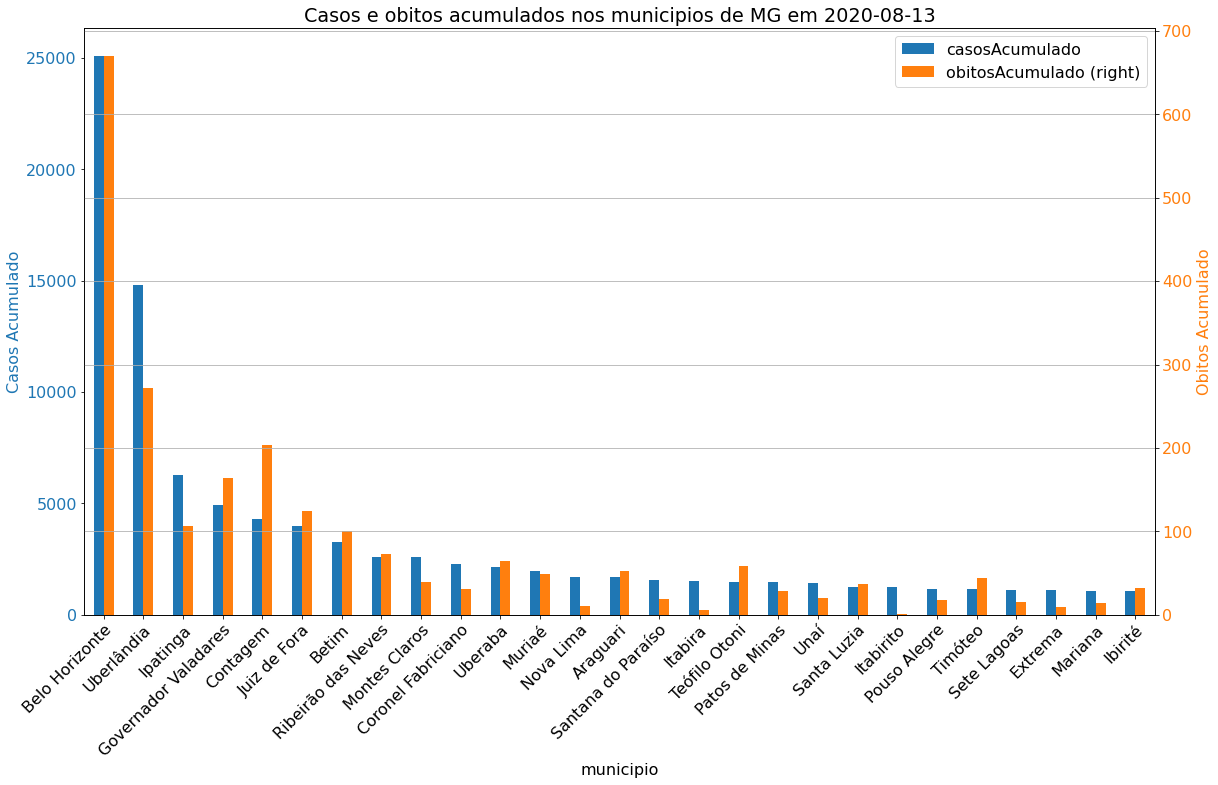

In [118]:
dfSP.plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

ax1, ax2 = plt.gcf().get_axes()
# ax1.tick_params(axis='x', labelrotation=55, ha='right')
# plt.xticks(rotation=15,ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

color = 'tab:blue'
ax1.set_ylabel('Casos Acumulado', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_ylabel('Obitos Acumulado', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Casos e obitos acumulados nos municipios de '+str(dfEstado[10]+' em '+str(today)))

plt.grid()
plt.show()

In [59]:
# fig = plt.figure(figsize=(19.20,10.80)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes



# width = 0.4
# dfSP.casosAcumulado.plot(kind='bar',color='red', ax=ax, width=width, position=1)
# ax.set_ylabel('Casos Acumulados')
# ax.set_xlabel('municipio')

# ax2 = ax.twinx() 


# dfSP.obitosAcumulado.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
# ax.set_ylabel('Obtidos Acumulados')

# ax2.set_ylabel('Price')

# plt.grid()
# plt.show()

In [58]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

In [58]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()